# Image preprocessing for gender classification

**The image preprocessing steps used are highly inspired by one of the articles provided by the professors: [CNN-based ensemble model for gender prediction](http://www.eurecom.fr/fr/publication/4768/download/mm-publi-4768.pdf).** The steps go as follows:

*  We perform face recognition using implementations of the [Viola-Jones face detector](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework). The face detector will provide us with coordinates of a rectangle containing the face of the facebook user. When profile pictures contain more than one face, the detector will simply choose the bigger rectangle as coordinates.

* We expand the rectangular box in both x and y directions.

* We crop around the new coordinates.

* We resize the image to a fixed 128 x 128 pixels image.

In [2]:
import os, sys
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
from matplotlib import image
from scipy import misc

import warnings
warnings.filterwarnings("ignore")

#### 1. Adding to sys.path where the open cv2 files are (if you don't have OpenCV installed, you can use the following command: pip install opencv-python).

In [3]:
# you append the path where cv2 files are saved
sys.path.append(r"C:/Users/jawad/Anaconda3/Lib/site-packages/cv2")

print(os.getcwd())

C:\Users\jawad\Documents\DATA_SCIENCE\Facebook-User-Predictions\notebooks


#### 2. Converting images from jpg format to numpy arrays

uint8
(547, 547, 3)


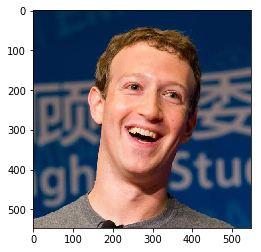

In [11]:
# load image as pixel array
mark = image.imread('mark.jpg')

# summarize shape of the pixel array
print(mark.dtype)
print(mark.shape)

# display the array of pixels as an image
plt.imshow(mark)

#### 3. Using pre-trained weights from OpenCV to perform face recognition

In [12]:
path_weights = "/Users/jawad/Anaconda3/Lib/site-packages/cv2/data"

cascPath = path_weights + "/haarcascade_frontalface_default.xml"
eyePath = path_weights + "/haarcascade_eye.xml"
smilePath = path_weights + "/haarcascade_smile.xml"

faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade = cv2.CascadeClassifier(smilePath)

#### 4. Defining helper functions to detect faces

In [13]:
def detecting_faces(image, faceCascade):

    face = faceCascade.detectMultiScale(
    image,
    scaleFactor=1.1,
    minNeighbors=5,
    flags=cv2.CASCADE_SCALE_IMAGE
    )
    
    return face

def draw_faces(image, coordinates):

    for (x, y, w, h) in coordinates: 
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 3)

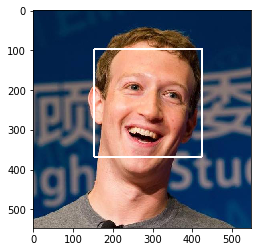

In [14]:
face = detecting_faces(mark, faceCascade)
draw_faces(mark, face) 
plt.imshow(mark)

Here is example where more than one face can be found on a profile picture:

uint8
(960, 960, 3)


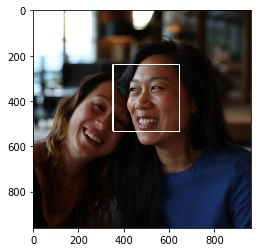

In [15]:
# load image as pixel array
priscilla = image.imread('priscilla.jpg')

# summarize shape of the pixel array
print(priscilla.dtype)
print(priscilla.shape)

# apply face detection algorithm
faces = detecting_faces(priscilla, faceCascade)
draw_faces(priscilla, faces) 
plt.imshow(priscilla)

In [16]:
print(faces)

[[352 239 294 294]]


#### 4. We can now expand the rectangular box containing the face by 30% in the x direction and 40% in the y direction, as maybe hair will help us make inferences on gender (maybe!) .

In [17]:
def expand(coordinates):
    
    pts = coordinates[0]
    
    x_min = pts[0]
    y_min = pts[1]
    x_max = pts[0] + pts[2]
    y_max = pts[1] + pts[3]
    
    x_min -= (0.15 * pts[2])
    x_max += (0.15 * pts[2])
    y_min -= (0.20 * pts[3])
    y_max += (0.20 * pts[3])
    
    return [[int(x_min), int(y_min), int(x_max-x_min), int(y_max-y_min)]]

In [18]:
new_faces = expand(faces)
print(new_faces)

[[307, 180, 382, 411]]


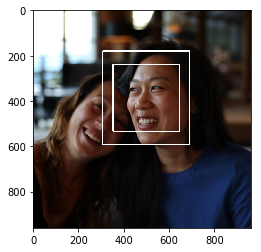

In [19]:
draw_faces(priscilla, new_faces) 
plt.imshow(priscilla)

#### 5. Now cropping around the new coordinates using slicing:

In [20]:
def crop(image, coordinates):

    x_min = coordinates[0][0]
    x_max = coordinates[0][0] + coordinates[0][2]
    y_min = coordinates[0][1]
    y_max = coordinates[0][1] + coordinates[0][3]

    image = image[y_min:y_max, x_min:x_max]
    return image

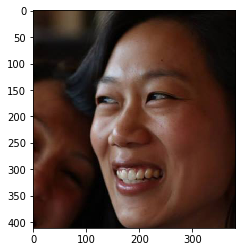

In [21]:
priscilla = image.imread('priscilla.jpg')

priscilla_cropped = crop(priscilla, new_faces)
plt.imshow(priscilla_cropped)

#### 6. Finally, we resize to a 128 x 128 pixels image.

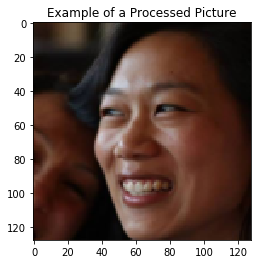

In [22]:
plt.title("Example of a Processed Picture")
priscilla_resized = misc.imresize(priscilla_cropped, (128, 128))
plt.imshow(priscilla_resized)